# Simulación de las llegadas de las llamadas telefónicas
Las llamadas siguen una distribución de Poisson con una tasa media de 20 llamadas por hora. Se desea simular el número de llamadas que se reciben en un intervalo de X horas.

Llamadas por hora: [21 16 15 18 15 18 23 21 25 16 16 19 24 23 15 27 20 17 24 14 20 21 18 24]
Total de llamadas en 24 horas: 470


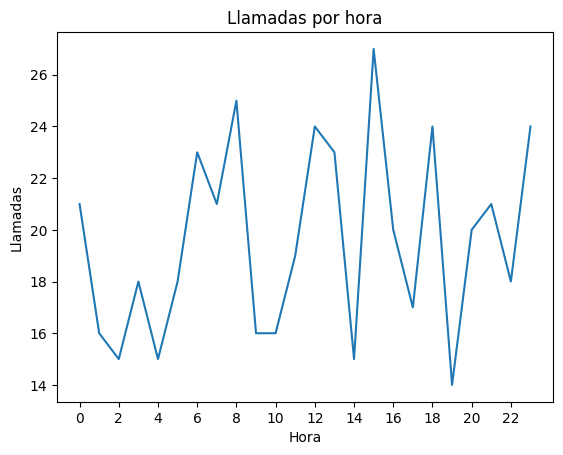

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
media_llamadas_por_hora = 20
horas_simuladas = 24

# Generar llegadas de llamadas
llamadas_por_hora = np.random.poisson(media_llamadas_por_hora, horas_simuladas)

print(f"Llamadas por hora: {llamadas_por_hora}")
# Total de llamadas en el día
total_llamadas = np.sum(llamadas_por_hora)
print(f"Total de llamadas en {horas_simuladas} horas: {total_llamadas}")



# plotear las  llamadas por hora
plt.plot(llamadas_por_hora)
plt.xlabel('Hora')
plt.ylabel('Llamadas')
plt.title('Llamadas por hora')
plt.xticks(range(0, horas_simuladas, 2))
plt.show()
